In [409]:
country = 'all_euro_weighted'

In [410]:
import scipy.io as sio
import h5py



file_path_1 = f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Discount_Rate/boot1/All_Euro/df_interest_sovereign_CDS_weighted_all_euro_normal.mat"

#with h5py.File(file_path_1, 'r') as mat_file:
    # Access the dataset inside the .mat file (the structure depends on your file)
#    df_interest = mat_file['df_interest_sovereign_CDS_all_1'][:]


# Load the .mat file
mat_data = sio.loadmat(file_path_1)

df_interest = mat_data['df_interest_sovereign_CDS_all_1']

file_path_0 = f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Discount_Rate/boot0/All_Euro/df_interest_sovereign_CDS_weighted_all_euro_normal.mat"


#with h5py.File(file_path_0, 'r') as mat_file:
    # Access the dataset inside the .mat file (the structure depends on your file)
#    df_interest_boot0 = mat_file['df_interest_sovereign_CDS_all_1'][:]

# Load the .mat file
mat_data = sio.loadmat(file_path_0)

df_interest_boot0 = mat_data['df_interest_sovereign_CDS_all_1']


In [411]:
df_interest_boot0 = ((1/df_interest_boot0)-1)

In [412]:
import pandas as pd

dfs = []

for i in range(12):
    
    maturity_df = pd.DataFrame(df_interest[i, :, :])
    
    dfs.append(maturity_df)


df_maturity_1 = dfs[0]  # Data for the 1st maturity
df_maturity_2 = dfs[1]  # Data for the 2nd maturity
df_maturity_3 = dfs[2]  # Data for the 1st maturity
df_maturity_4 = dfs[3]
df_maturity_5 = dfs[4]  # Data for the 1st maturity
df_maturity_6 = dfs[5]
df_maturity_7 = dfs[6]  # Data for the 1st maturity
df_maturity_8 = dfs[7]  # Data for the 1st maturity
df_maturity_9 = dfs[8]  # Data for the 1st maturity
df_maturity_10 = dfs[9]  # Data for the 1st maturity
df_maturity_11 = dfs[10]  # Data for the 1st maturity
df_maturity_12 = dfs[11]  # Data for the 1st maturity



In [413]:
df_maturity_1 = ((1/df_maturity_1)-1)
df_maturity_2 = ((1/df_maturity_2)-1)
df_maturity_3 = ((1/df_maturity_3)-1)
df_maturity_4 = ((1/df_maturity_4)-1)
df_maturity_5 = ((1/df_maturity_5)-1)
df_maturity_6 = ((1/df_maturity_6)-1)
df_maturity_7 = ((1/df_maturity_7)-1)
df_maturity_8 = ((1/df_maturity_8)-1)
df_maturity_9 = ((1/df_maturity_9)-1)
df_maturity_10 = ((1/df_maturity_10)-1)
df_maturity_11 = ((1/df_maturity_11)-1)
df_maturity_12 = ((1/df_maturity_12)-1)

# MATURITY 2 DAYS

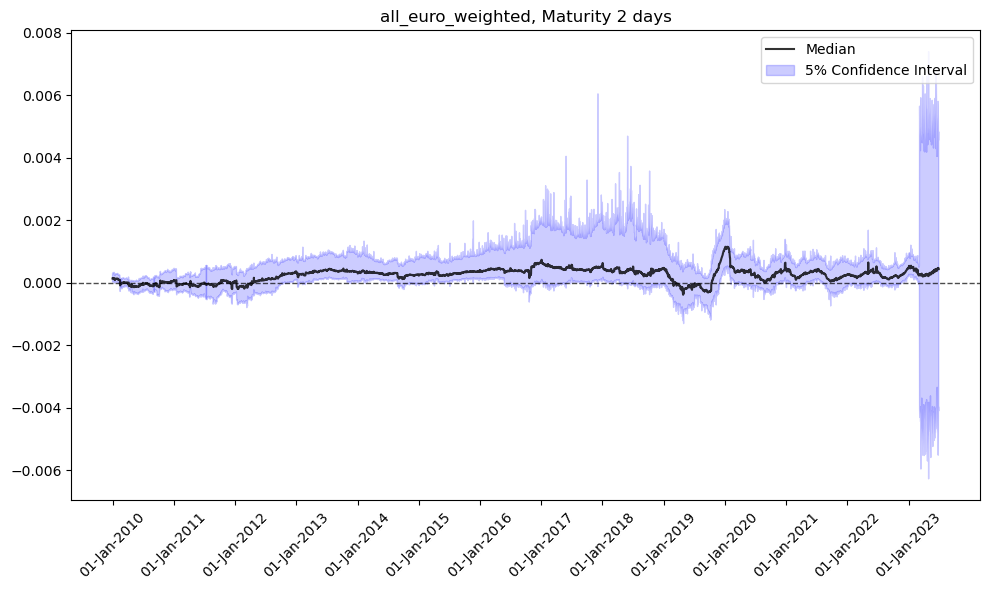

In [414]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

start_date = datetime.datetime(2010, 1, 1)
date_range = pd.date_range(start=start_date, periods=4928, freq='D')

tick_dates = pd.date_range(start=start_date, periods=4928//365+1, freq='YS')
tick_positions = [date_range.get_loc(date) for date in tick_dates]

mean_maturity_1 = df_maturity_1.median(axis=1)

# Compute the 2.5th and 97.5th percentiles (for the 5% confidence interval)
lower_bound = np.percentile(df_maturity_1, 2.5, axis=1)
upper_bound = np.percentile(df_maturity_1, 97.5, axis=1)

# Plot the mean and the confidence intervals
plt.figure(figsize=(10,6))
plt.plot(mean_maturity_1, label="Median", color='black', alpha = 0.8)

# Shaded region for confidence intervals
plt.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.7)

# Set x-ticks to correspond to 1st January of each year
plt.xticks(tick_positions, tick_dates.strftime('%d-%b-%Y'), rotation=45)

# Add labels and title

plt.title(f"{country}, Maturity 2 days")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.savefig(f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Plots/Sovereign/CDS/{country}/Interest Rate/Median/2 Days.png")

plt.show()





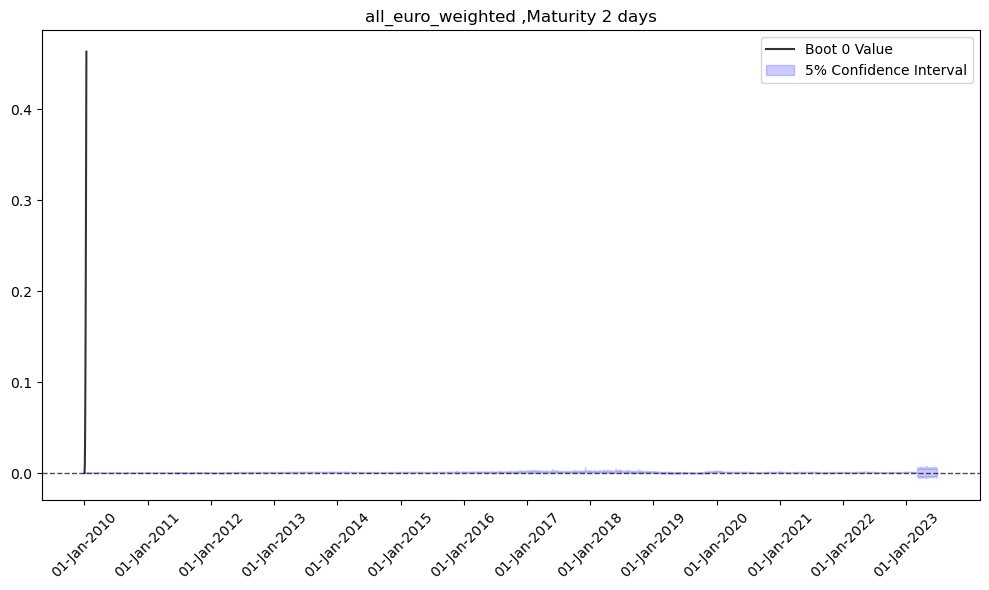

In [415]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

boot0_df = pd.DataFrame(df_interest_boot0[:, 0])

array = boot0_df.iloc[:,0].to_numpy()

# array = df_interest_boot0.iloc[0].to_numpy()

# Assuming dfs[0] to dfs[6] are your DataFrames for each maturity
# Let's take the first maturity as an example (dfs[0])
#df_maturity_1 = dfs[0]  # This is the 4928x5000 DataFrame for the first maturity

# Compute the mean across the 5000 bootstraps for each time step
mean_maturity_1 = df_maturity_1.median(axis=1)

# Compute the 2.5th and 97.5th percentiles (for the 5% confidence interval)
lower_bound = np.percentile(df_maturity_1, 2.5, axis=1)
upper_bound = np.percentile(df_maturity_1, 97.5, axis=1)

# Plot the mean and the confidence intervals
plt.figure(figsize=(10,6))
plt.plot(array, label="Boot 0 Value", color='black', alpha = 0.8)

# Shaded region for confidence intervals
plt.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.7)

# Set x-ticks to correspond to 1st January of each year
plt.xticks(tick_positions, tick_dates.strftime('%d-%b-%Y'), rotation=45)

# Add labels and title


plt.title(f"{country} ,Maturity 2 days")
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.savefig(f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Plots/Sovereign/CDS/{country}/Interest Rate/Boot 0 Value/2 Days.png")
plt.show()



# 6 MONTHS

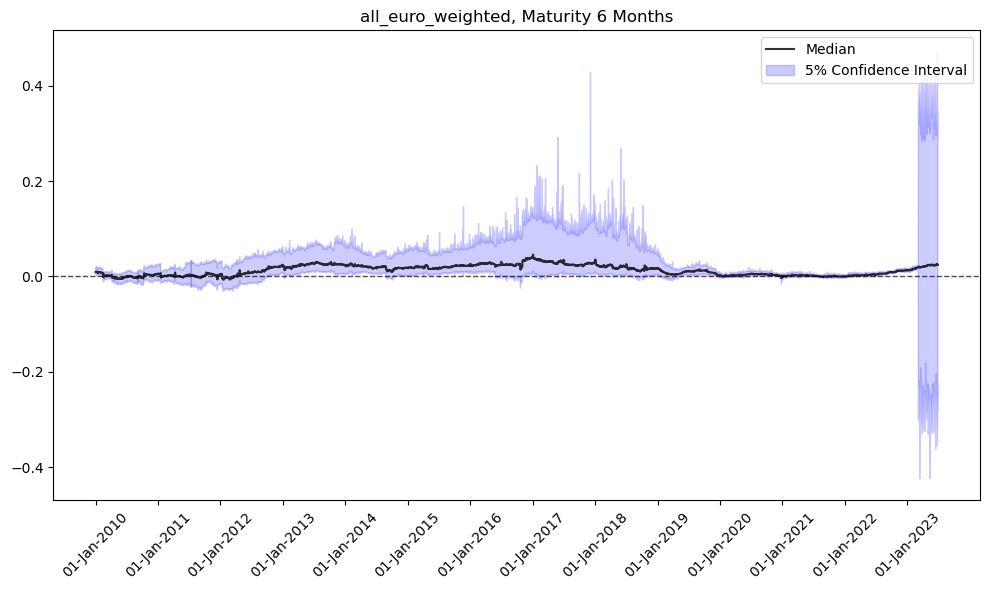

In [416]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

start_date = datetime.datetime(2010, 1, 1)
date_range = pd.date_range(start=start_date, periods=4928, freq='D')

tick_dates = pd.date_range(start=start_date, periods=4928//365+1, freq='YS')
tick_positions = [date_range.get_loc(date) for date in tick_dates]

mean_maturity_1 = df_maturity_2.median(axis=1)

# Compute the 2.5th and 97.5th percentiles (for the 5% confidence interval)
lower_bound = np.percentile(df_maturity_2, 2.5, axis=1)
upper_bound = np.percentile(df_maturity_2, 97.5, axis=1)

# Plot the mean and the confidence intervals
plt.figure(figsize=(10,6))
plt.plot(mean_maturity_1, label="Median", color='black', alpha = 0.8)

# Shaded region for confidence intervals
plt.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.7)

# Set x-ticks to correspond to 1st January of each year
plt.xticks(tick_positions, tick_dates.strftime('%d-%b-%Y'), rotation=45)

# Add labels and title

plt.title(f"{country}, Maturity 6 Months")
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.savefig(f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Plots/Sovereign/CDS/{country}/Interest Rate/Median/6 Months.png")

plt.show()


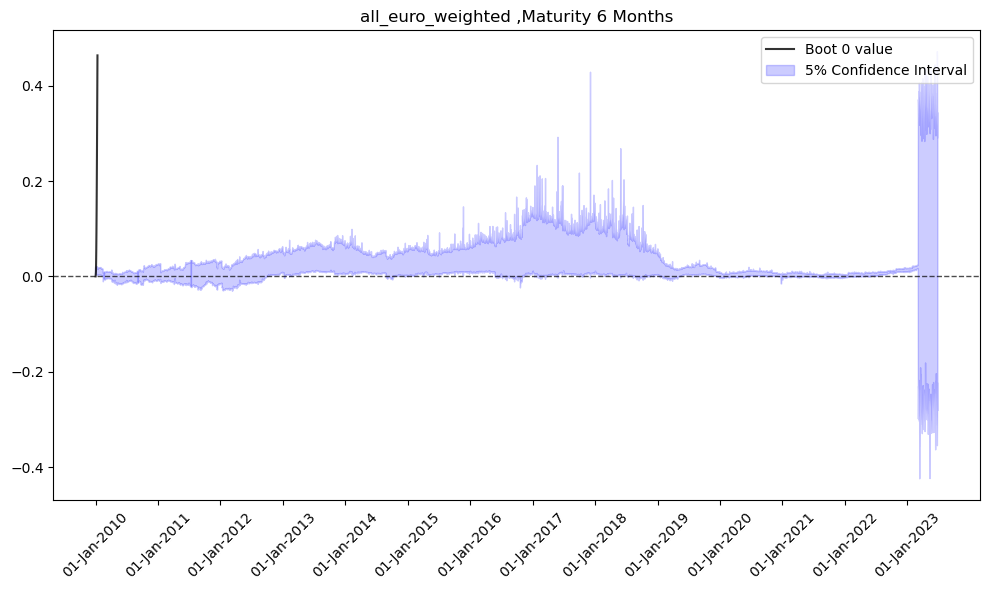

In [417]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

boot0_df = pd.DataFrame(df_interest_boot0[:, 1])

array = boot0_df.iloc[:,0].to_numpy()

# array = df_interest_boot0.iloc[0].to_numpy()

# Assuming dfs[0] to dfs[6] are your DataFrames for each maturity
# Let's take the first maturity as an example (dfs[0])
#df_maturity_2 = dfs[0]  # This is the 4928x5000 DataFrame for the first maturity

# Compute the mean across the 5000 bootstraps for each time step
mean_maturity_1 = df_maturity_2.median(axis=1)

# Compute the 2.5th and 97.5th percentiles (for the 5% confidence interval)
lower_bound = np.percentile(df_maturity_2, 2.5, axis=1)
upper_bound = np.percentile(df_maturity_2, 97.5, axis=1)

# Plot the mean and the confidence intervals
plt.figure(figsize=(10,6))
plt.plot(array, label="Boot 0 value", color='black', alpha = 0.8)

# Shaded region for confidence intervals
plt.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.7)

# Set x-ticks to correspond to 1st January of each year
plt.xticks(tick_positions, tick_dates.strftime('%d-%b-%Y'), rotation=45)

# Add labels and title

plt.title(f"{country} ,Maturity 6 Months")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.savefig(f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Plots/Sovereign/CDS/{country}/Interest Rate/Boot 0 Value/6 Months.png")

plt.show()


# 1 Year

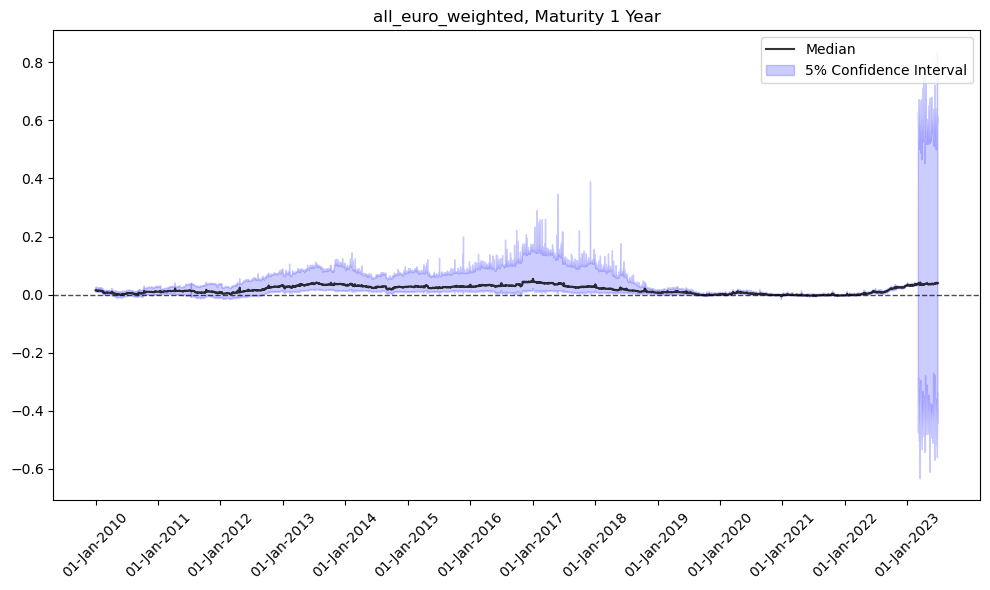

In [418]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

start_date = datetime.datetime(2010, 1, 1)
date_range = pd.date_range(start=start_date, periods=4928, freq='D')

tick_dates = pd.date_range(start=start_date, periods=4928//365+1, freq='YS')
tick_positions = [date_range.get_loc(date) for date in tick_dates]

mean_maturity_1 = df_maturity_3.median(axis=1)

# Compute the 2.5th and 97.5th percentiles (for the 5% confidence interval)
lower_bound = np.percentile(df_maturity_3, 2.5, axis=1)
upper_bound = np.percentile(df_maturity_3, 97.5, axis=1)

# Plot the mean and the confidence intervals
plt.figure(figsize=(10,6))
plt.plot(mean_maturity_1, label="Median", color='black', alpha = 0.8)

# Shaded region for confidence intervals
plt.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.7)

# Set x-ticks to correspond to 1st January of each year
plt.xticks(tick_positions, tick_dates.strftime('%d-%b-%Y'), rotation=45)

# Add labels and title

plt.title(f"{country}, Maturity 1 Year")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.savefig(f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Plots/Sovereign/CDS/{country}/Interest Rate/Median/1 Year.png")

plt.show()


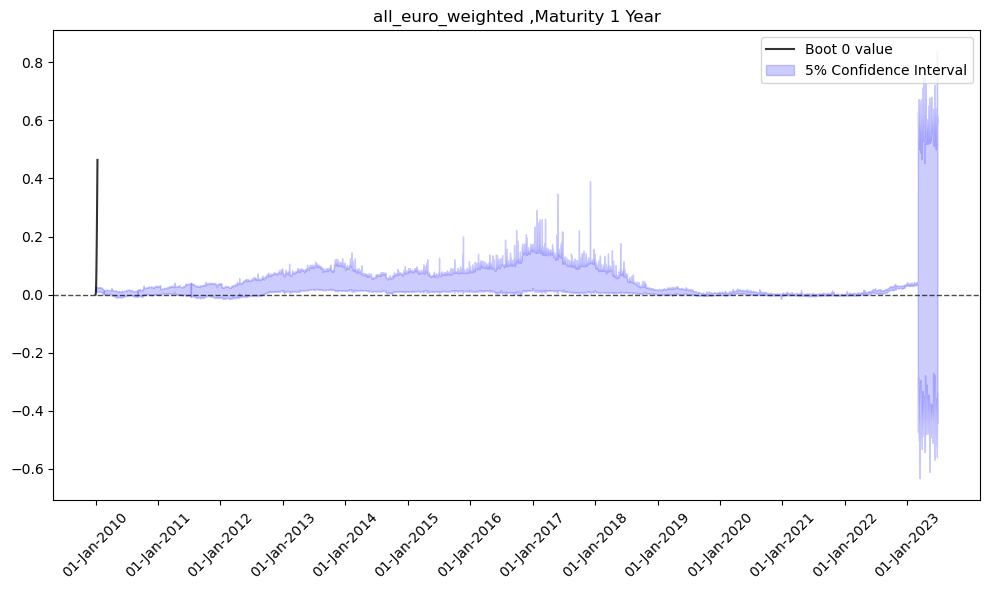

In [419]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

boot0_df = pd.DataFrame(df_interest_boot0[:, 2])

array = boot0_df.iloc[:,0].to_numpy()

# array = df_interest_boot0.iloc[0].to_numpy()

# Assuming dfs[0] to dfs[6] are your DataFrames for each maturity
# Let's take the first maturity as an example (dfs[0])
#df_maturity_3 = dfs[0]  # This is the 4928x5000 DataFrame for the first maturity

# Compute the mean across the 5000 bootstraps for each time step
mean_maturity_1 = df_maturity_3.median(axis=1)

# Compute the 2.5th and 97.5th percentiles (for the 5% confidence interval)
lower_bound = np.percentile(df_maturity_3, 2.5, axis=1)
upper_bound = np.percentile(df_maturity_3, 97.5, axis=1)

# Plot the mean and the confidence intervals
plt.figure(figsize=(10,6))
plt.plot(array, label="Boot 0 value", color='black', alpha = 0.8)

# Shaded region for confidence intervals
plt.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.7)

# Set x-ticks to correspond to 1st January of each year
plt.xticks(tick_positions, tick_dates.strftime('%d-%b-%Y'), rotation=45)

# Add labels and title

plt.title(f"{country} ,Maturity 1 Year")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.savefig(f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Plots/Sovereign/CDS/{country}/Interest Rate/Boot 0 Value/1 Year.png")

plt.show()


#  2 Years

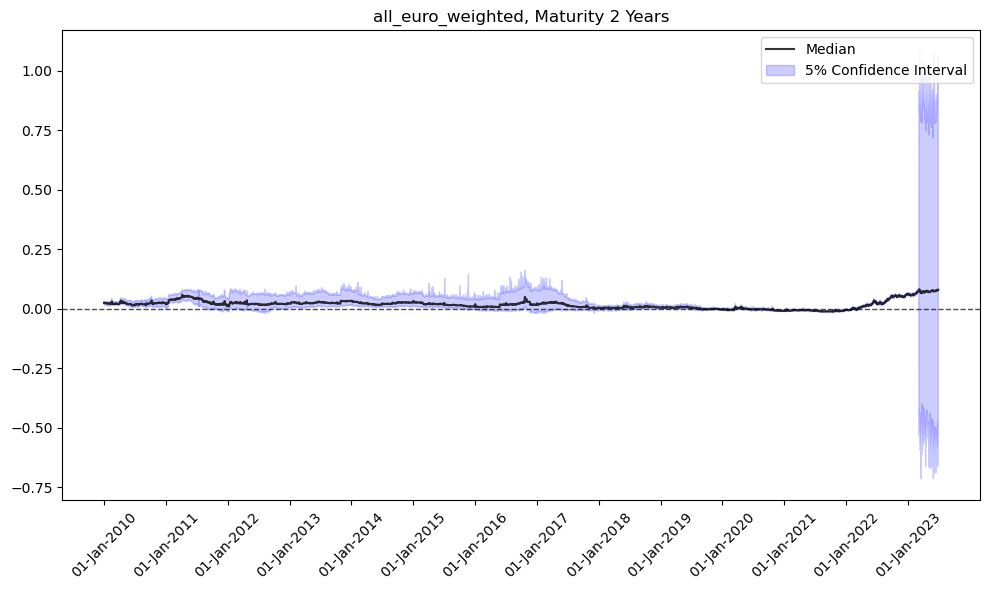

In [420]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

start_date = datetime.datetime(2010, 1, 1)
date_range = pd.date_range(start=start_date, periods=4928, freq='D')

tick_dates = pd.date_range(start=start_date, periods=4928//365+1, freq='YS')
tick_positions = [date_range.get_loc(date) for date in tick_dates]

mean_maturity_1 = df_maturity_4.median(axis=1)

# Compute the 2.5th and 97.5th percentiles (for the 5% confidence interval)
lower_bound = np.percentile(df_maturity_4, 2.5, axis=1)
upper_bound = np.percentile(df_maturity_4, 97.5, axis=1)

# Plot the mean and the confidence intervals
plt.figure(figsize=(10,6))
plt.plot(mean_maturity_1, label="Median", color='black', alpha = 0.8)

# Shaded region for confidence intervals
plt.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.7)

# Set x-ticks to correspond to 1st January of each year
plt.xticks(tick_positions, tick_dates.strftime('%d-%b-%Y'), rotation=45)

# Add labels and title

plt.title(f"{country}, Maturity 2 Years")
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.savefig(f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Plots/Sovereign/CDS/{country}/Interest Rate/Median/2 Years.png")

plt.show()


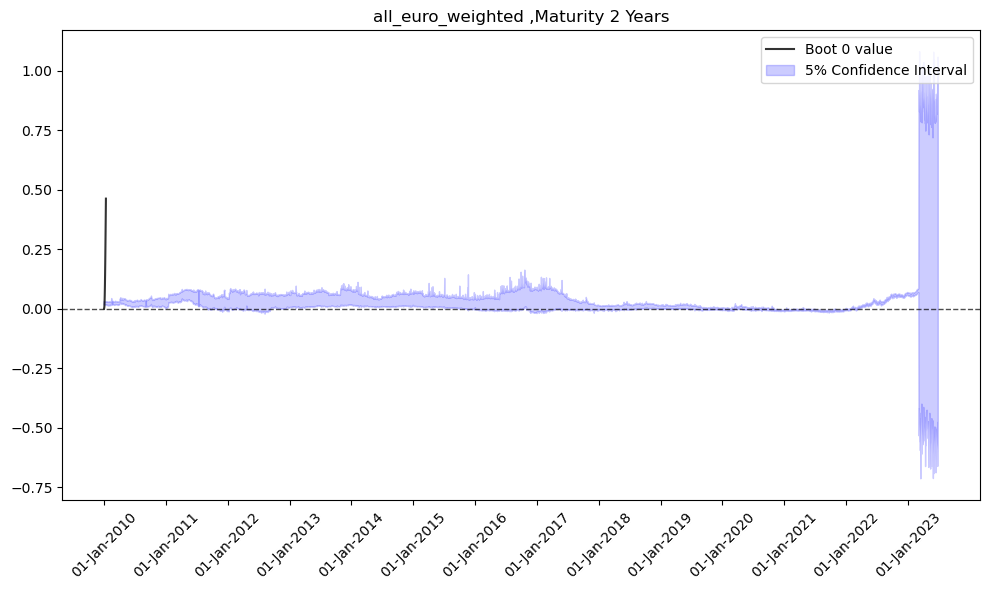

In [421]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

boot0_df = pd.DataFrame(df_interest_boot0[:, 3])

array = boot0_df.iloc[:,0].to_numpy()

# array = df_interest_boot0.iloc[0].to_numpy()

# Assuming dfs[0] to dfs[6] are your DataFrames for each maturity
# Let's take the first maturity as an example (dfs[0])
#df_maturity_4 = dfs[0]  # This is the 4928x5000 DataFrame for the first maturity

# Compute the mean across the 5000 bootstraps for each time step
mean_maturity_1 = df_maturity_4.median(axis=1)

# Compute the 2.5th and 97.5th percentiles (for the 5% confidence interval)
lower_bound = np.percentile(df_maturity_4, 2.5, axis=1)
upper_bound = np.percentile(df_maturity_4, 97.5, axis=1)

# Plot the mean and the confidence intervals
plt.figure(figsize=(10,6))
plt.plot(array, label="Boot 0 value", color='black', alpha = 0.8)

# Shaded region for confidence intervals
plt.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.7)

# Set x-ticks to correspond to 1st January of each year
plt.xticks(tick_positions, tick_dates.strftime('%d-%b-%Y'), rotation=45)

# Add labels and title

plt.title(f"{country} ,Maturity 2 Years")
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.savefig(f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Plots/Sovereign/CDS/{country}/Interest Rate/Boot 0 Value/2 Years.png")

plt.show()


# 3 Years

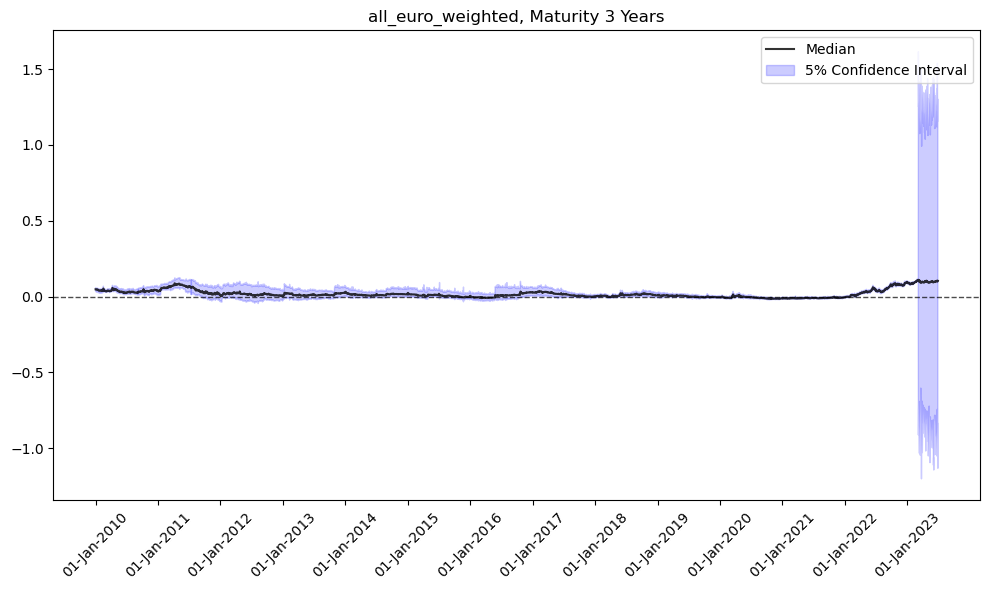

In [422]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

start_date = datetime.datetime(2010, 1, 1)
date_range = pd.date_range(start=start_date, periods=4928, freq='D')

tick_dates = pd.date_range(start=start_date, periods=4928//365+1, freq='YS')
tick_positions = [date_range.get_loc(date) for date in tick_dates]

mean_maturity_1 = df_maturity_5.median(axis=1)

# Compute the 2.5th and 97.5th percentiles (for the 5% confidence interval)
lower_bound = np.percentile(df_maturity_5, 2.5, axis=1)
upper_bound = np.percentile(df_maturity_5, 97.5, axis=1)

# Plot the mean and the confidence intervals
plt.figure(figsize=(10,6))
plt.plot(mean_maturity_1, label="Median", color='black', alpha = 0.8)

# Shaded region for confidence intervals
plt.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.7)

# Set x-ticks to correspond to 1st January of each year
plt.xticks(tick_positions, tick_dates.strftime('%d-%b-%Y'), rotation=45)

# Add labels and title

plt.title(f"{country}, Maturity 3 Years")
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.savefig(f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Plots/Sovereign/CDS/{country}/Interest Rate/Median/3 Years.png")

plt.show()


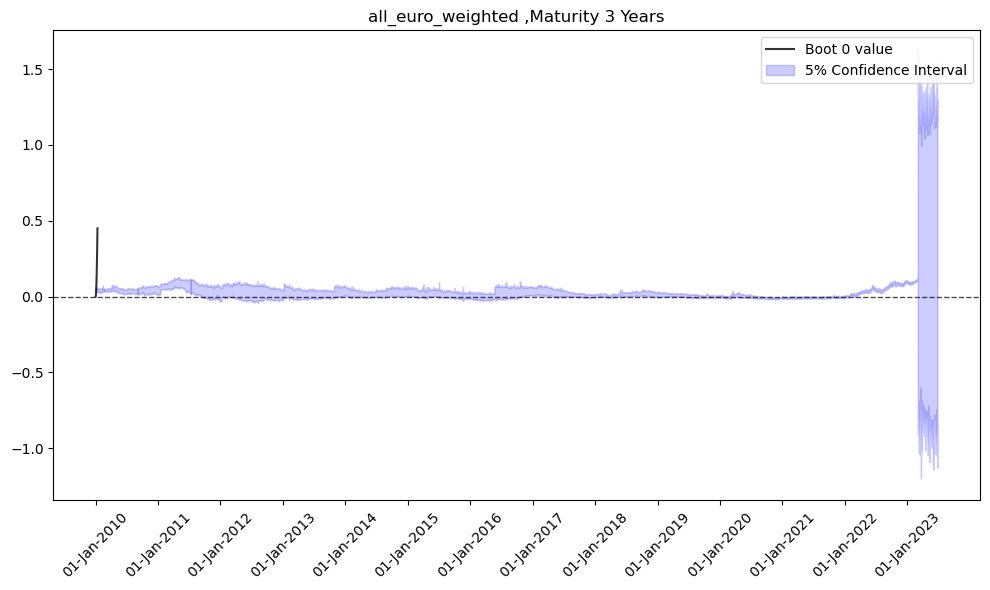

In [423]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

boot0_df = pd.DataFrame(df_interest_boot0[:, 4])

array = boot0_df.iloc[:,0].to_numpy()

# array = df_interest_boot0.iloc[0].to_numpy()

# Assuming dfs[0] to dfs[6] are your DataFrames for each maturity
# Let's take the first maturity as an example (dfs[0])
#df_maturity_5 = dfs[0]  # This is the 4928x5000 DataFrame for the first maturity

# Compute the mean across the 5000 bootstraps for each time step
mean_maturity_1 = df_maturity_5.median(axis=1)

# Compute the 2.5th and 97.5th percentiles (for the 5% confidence interval)
lower_bound = np.percentile(df_maturity_5, 2.5, axis=1)
upper_bound = np.percentile(df_maturity_5, 97.5, axis=1)

# Plot the mean and the confidence intervals
plt.figure(figsize=(10,6))
plt.plot(array, label="Boot 0 value", color='black', alpha = 0.8)

# Shaded region for confidence intervals
plt.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.7)

# Set x-ticks to correspond to 1st January of each year
plt.xticks(tick_positions, tick_dates.strftime('%d-%b-%Y'), rotation=45)

# Add labels and title

plt.title(f"{country} ,Maturity 3 Years")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.savefig(f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Plots/Sovereign/CDS/{country}/Interest Rate/Boot 0 Value/3 Years.png")

plt.show()


# 4 Years

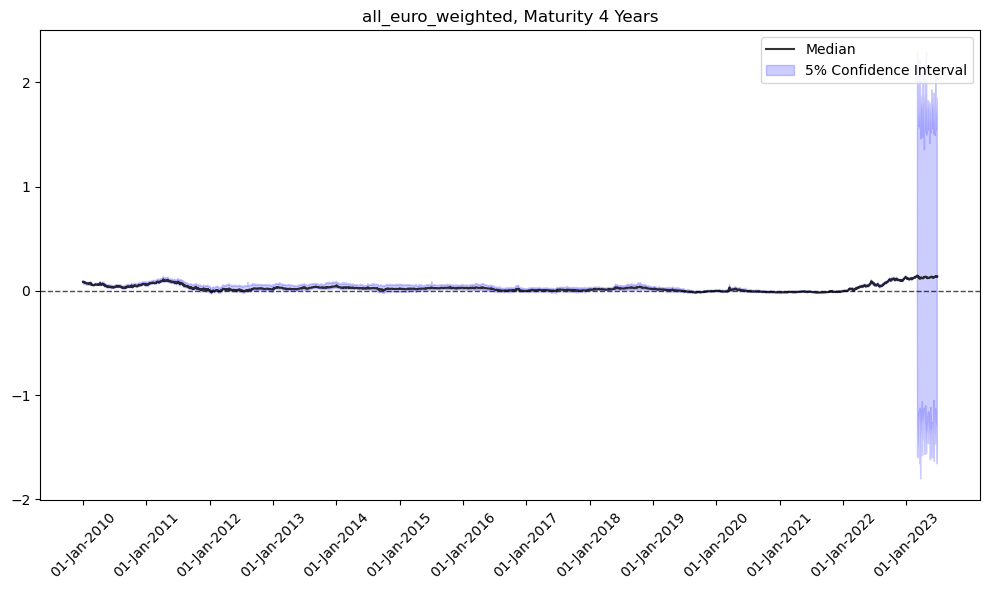

In [424]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

start_date = datetime.datetime(2010, 1, 1)
date_range = pd.date_range(start=start_date, periods=4928, freq='D')

tick_dates = pd.date_range(start=start_date, periods=4928//365+1, freq='YS')
tick_positions = [date_range.get_loc(date) for date in tick_dates]

mean_maturity_1 = df_maturity_6.median(axis=1)

# Compute the 2.5th and 97.5th percentiles (for the 5% confidence interval)
lower_bound = np.percentile(df_maturity_6, 2.5, axis=1)
upper_bound = np.percentile(df_maturity_6, 97.5, axis=1)

# Plot the mean and the confidence intervals
plt.figure(figsize=(10,6))
plt.plot(mean_maturity_1, label="Median", color='black', alpha = 0.8)

# Shaded region for confidence intervals
plt.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.7)

# Set x-ticks to correspond to 1st January of each year
plt.xticks(tick_positions, tick_dates.strftime('%d-%b-%Y'), rotation=45)

# Add labels and title

plt.title(f"{country}, Maturity 4 Years")
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.savefig(f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Plots/Sovereign/CDS/{country}/Interest Rate/Median/4 Years.png")

plt.show()


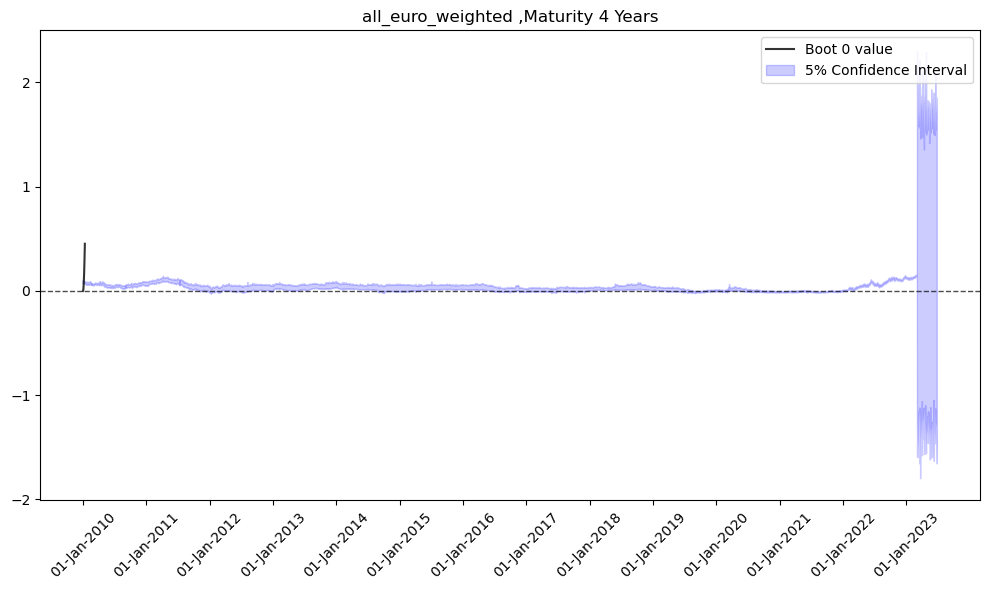

In [425]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

boot0_df = pd.DataFrame(df_interest_boot0[:, 5])

array = boot0_df.iloc[:,0].to_numpy()

# array = df_interest_boot0.iloc[0].to_numpy()

# Assuming dfs[0] to dfs[6] are your DataFrames for each maturity
# Let's take the first maturity as an example (dfs[0])
#df_maturity_6 = dfs[0]  # This is the 4928x5000 DataFrame for the first maturity

# Compute the mean across the 5000 bootstraps for each time step
mean_maturity_1 = df_maturity_6.median(axis=1)

# Compute the 2.5th and 97.5th percentiles (for the 5% confidence interval)
lower_bound = np.percentile(df_maturity_6, 2.5, axis=1)
upper_bound = np.percentile(df_maturity_6, 97.5, axis=1)

# Plot the mean and the confidence intervals
plt.figure(figsize=(10,6))
plt.plot(array, label="Boot 0 value", color='black', alpha = 0.8)

# Shaded region for confidence intervals
plt.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.7)

# Set x-ticks to correspond to 1st January of each year
plt.xticks(tick_positions, tick_dates.strftime('%d-%b-%Y'), rotation=45)

# Add labels and title

plt.title(f"{country} ,Maturity 4 Years")
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.savefig(f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Plots/Sovereign/CDS/{country}/Interest Rate/Boot 0 Value/4 Years.png")

plt.show()




# 5 Years

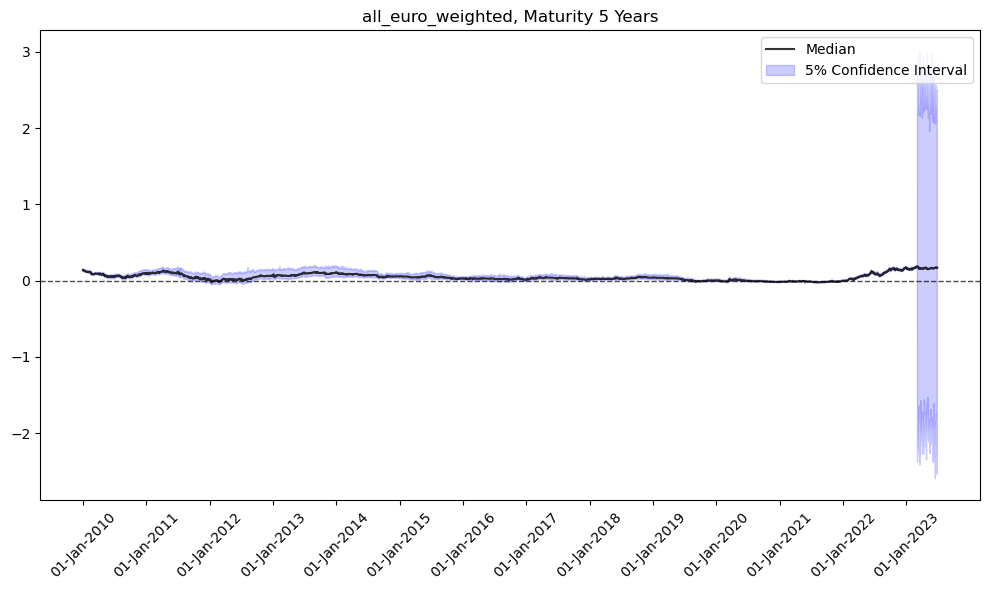

In [426]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

start_date = datetime.datetime(2010, 1, 1)
date_range = pd.date_range(start=start_date, periods=4928, freq='D')

tick_dates = pd.date_range(start=start_date, periods=4928//365+1, freq='YS')
tick_positions = [date_range.get_loc(date) for date in tick_dates]

mean_maturity_1 = df_maturity_7.median(axis=1)

# Compute the 2.5th and 97.5th percentiles (for the 5% confidence interval)
lower_bound = np.percentile(df_maturity_7, 2.5, axis=1)
upper_bound = np.percentile(df_maturity_7, 97.5, axis=1)

# Plot the mean and the confidence intervals
plt.figure(figsize=(10,6))
plt.plot(mean_maturity_1, label="Median", color='black', alpha = 0.8)

# Shaded region for confidence intervals
plt.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.7)

# Set x-ticks to correspond to 1st January of each year
plt.xticks(tick_positions, tick_dates.strftime('%d-%b-%Y'), rotation=45)

# Add labels and title

plt.title(f"{country}, Maturity 5 Years")
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.savefig(f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Plots/Sovereign/CDS/{country}/Interest Rate/Median/5 Years.png")

plt.show()


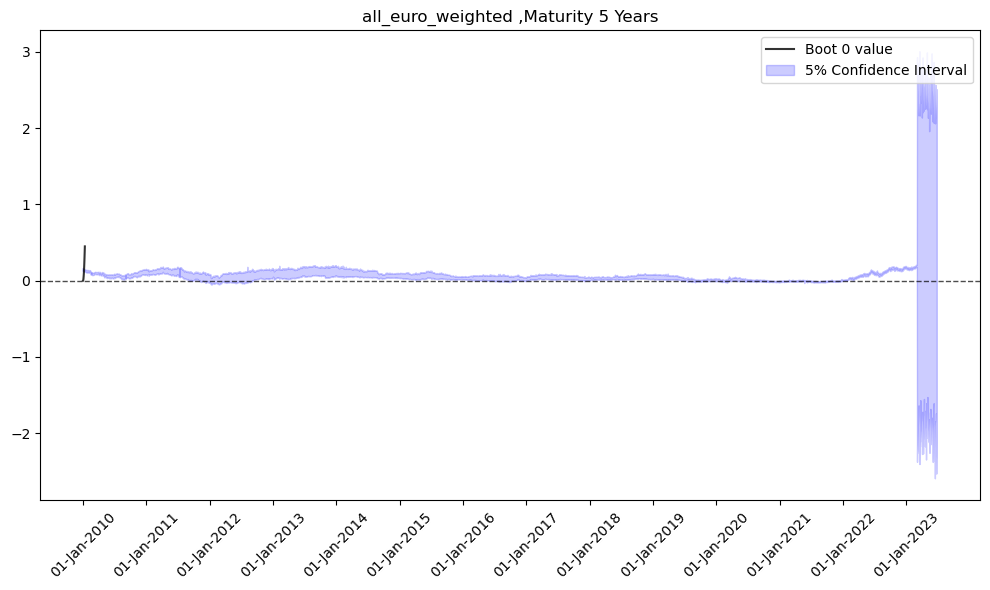

In [427]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

boot0_df = pd.DataFrame(df_interest_boot0[:, 6])

array = boot0_df.iloc[:,0].to_numpy()

# array = df_interest_boot0.iloc[0].to_numpy()

# Assuming dfs[0] to dfs[6] are your DataFrames for each maturity
# Let's take the first maturity as an example (dfs[0])
#df_maturity_7 = dfs[0]  # This is the 4928x5000 DataFrame for the first maturity

# Compute the mean across the 5000 bootstraps for each time step
mean_maturity_1 = df_maturity_7.median(axis=1)

# Compute the 2.5th and 97.5th percentiles (for the 5% confidence interval)
lower_bound = np.percentile(df_maturity_7, 2.5, axis=1)
upper_bound = np.percentile(df_maturity_7, 97.5, axis=1)

# Plot the mean and the confidence intervals
plt.figure(figsize=(10,6))
plt.plot(array, label="Boot 0 value", color='black', alpha = 0.8)

# Shaded region for confidence intervals
plt.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.7)

# Set x-ticks to correspond to 1st January of each year
plt.xticks(tick_positions, tick_dates.strftime('%d-%b-%Y'), rotation=45)

# Add labels and title

plt.title(f"{country} ,Maturity 5 Years")
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.savefig(f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Plots/Sovereign/CDS/{country}/Interest Rate/Boot 0 Value/5 Years.png")

plt.show()


# 6 Years

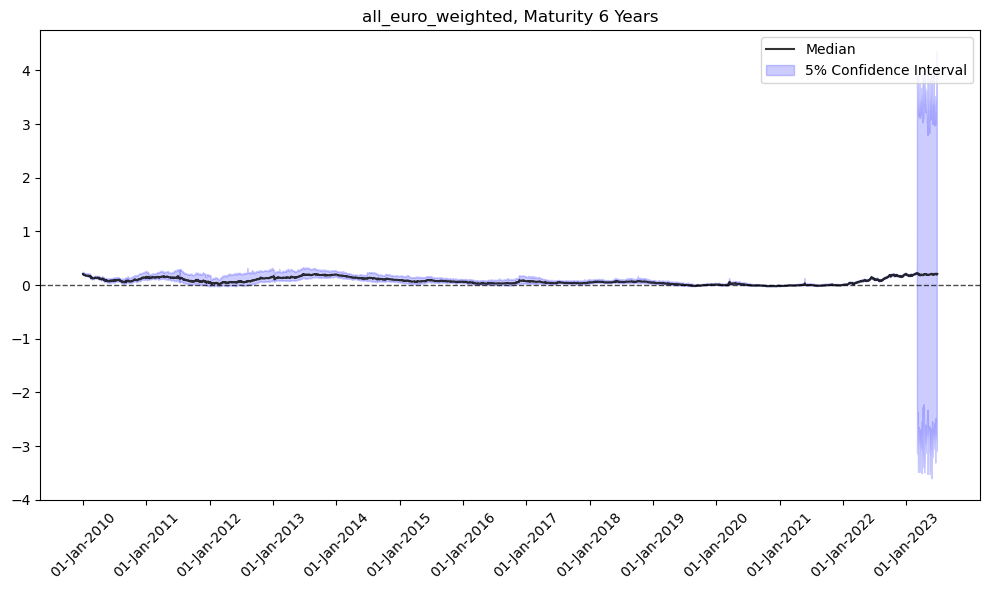

In [428]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

start_date = datetime.datetime(2010, 1, 1)
date_range = pd.date_range(start=start_date, periods=4928, freq='D')

tick_dates = pd.date_range(start=start_date, periods=4928//365+1, freq='YS')
tick_positions = [date_range.get_loc(date) for date in tick_dates]

mean_maturity_1 = df_maturity_8.median(axis=1)

# Compute the 2.5th and 97.5th percentiles (for the 5% confidence interval)
lower_bound = np.percentile(df_maturity_8, 2.5, axis=1)
upper_bound = np.percentile(df_maturity_8, 97.5, axis=1)

# Plot the mean and the confidence intervals
plt.figure(figsize=(10,6))
plt.plot(mean_maturity_1, label="Median", color='black', alpha = 0.8)

# Shaded region for confidence intervals
plt.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.7)

# Set x-ticks to correspond to 1st January of each year
plt.xticks(tick_positions, tick_dates.strftime('%d-%b-%Y'), rotation=45)

# Add labels and title

plt.title(f"{country}, Maturity 6 Years")
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.savefig(f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Plots/Sovereign/CDS/{country}/Interest Rate/Median/6 Years.png")

plt.show()


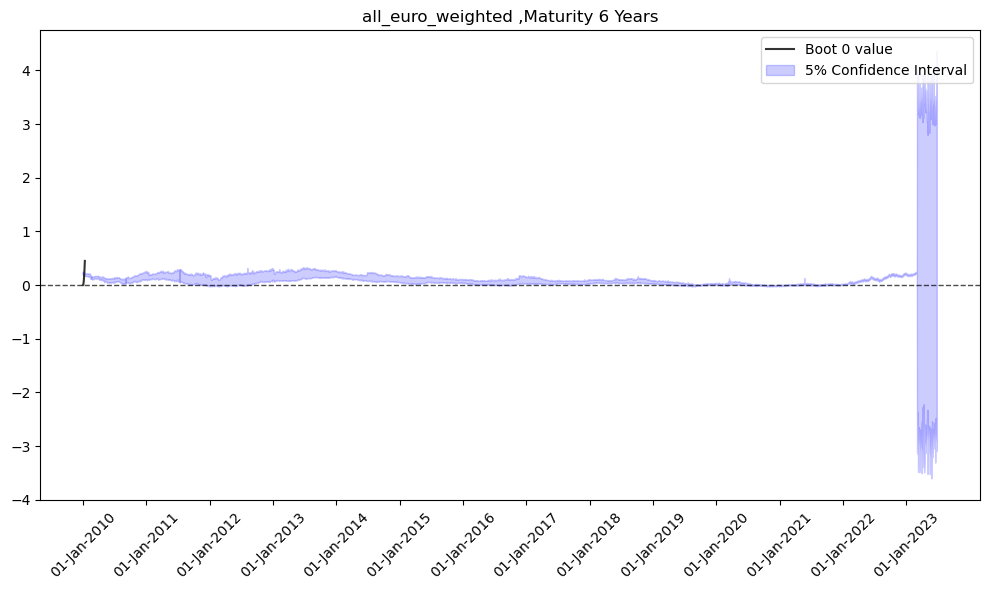

In [429]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

boot0_df = pd.DataFrame(df_interest_boot0[:, 7])

array = boot0_df.iloc[:,0].to_numpy()

# array = df_interest_boot0.iloc[0].to_numpy()

# Assuming dfs[0] to dfs[6] are your DataFrames for each maturity
# Let's take the first maturity as an example (dfs[0])
#df_maturity_7 = dfs[0]  # This is the 4928x5000 DataFrame for the first maturity

# Compute the mean across the 5000 bootstraps for each time step
mean_maturity_1 = df_maturity_8.median(axis=1)

# Compute the 2.5th and 97.5th percentiles (for the 5% confidence interval)
lower_bound = np.percentile(df_maturity_8, 2.5, axis=1)
upper_bound = np.percentile(df_maturity_8, 97.5, axis=1)

# Plot the mean and the confidence intervals
plt.figure(figsize=(10,6))
plt.plot(array, label="Boot 0 value", color='black', alpha = 0.8)

# Shaded region for confidence intervals
plt.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.7)

# Set x-ticks to correspond to 1st January of each year
plt.xticks(tick_positions, tick_dates.strftime('%d-%b-%Y'), rotation=45)

# Add labels and title

plt.title(f"{country} ,Maturity 6 Years")
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.savefig(f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Plots/Sovereign/CDS/{country}/Interest Rate/Boot 0 Value/6 Years.png")

plt.show()


# 7 Years

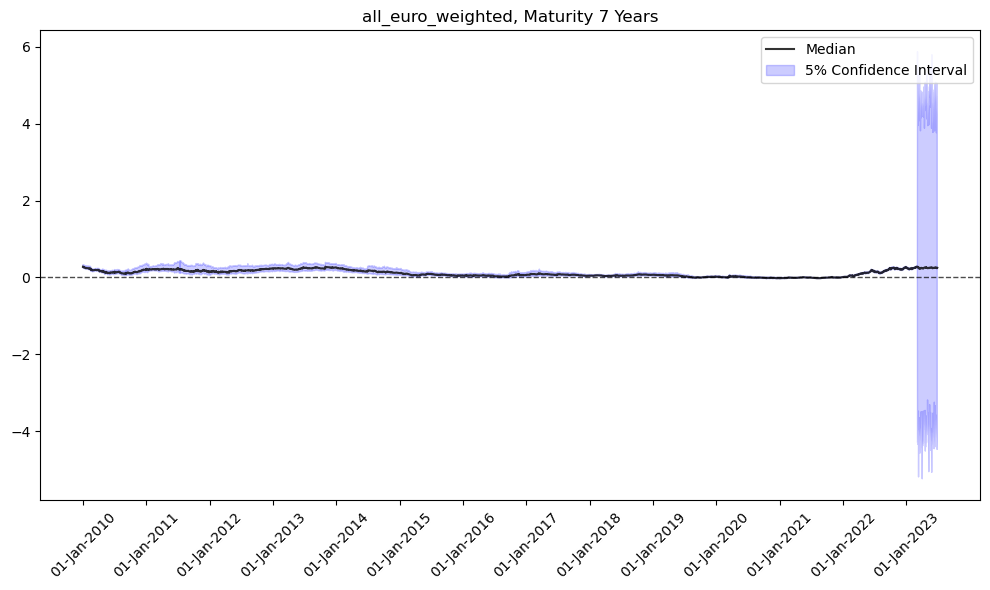

In [430]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

start_date = datetime.datetime(2010, 1, 1)
date_range = pd.date_range(start=start_date, periods=4928, freq='D')

tick_dates = pd.date_range(start=start_date, periods=4928//365+1, freq='YS')
tick_positions = [date_range.get_loc(date) for date in tick_dates]

mean_maturity_1 = df_maturity_9.median(axis=1)

# Compute the 2.5th and 97.5th percentiles (for the 5% confidence interval)
lower_bound = np.percentile(df_maturity_9, 2.5, axis=1)
upper_bound = np.percentile(df_maturity_9, 97.5, axis=1)

# Plot the mean and the confidence intervals
plt.figure(figsize=(10,6))
plt.plot(mean_maturity_1, label="Median", color='black', alpha = 0.8)

# Shaded region for confidence intervals
plt.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.7)

# Set x-ticks to correspond to 1st January of each year
plt.xticks(tick_positions, tick_dates.strftime('%d-%b-%Y'), rotation=45)

# Add labels and title

plt.title(f"{country}, Maturity 7 Years")
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.savefig(f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Plots/Sovereign/CDS/{country}/Interest Rate/Median/7 Years.png")

plt.show()


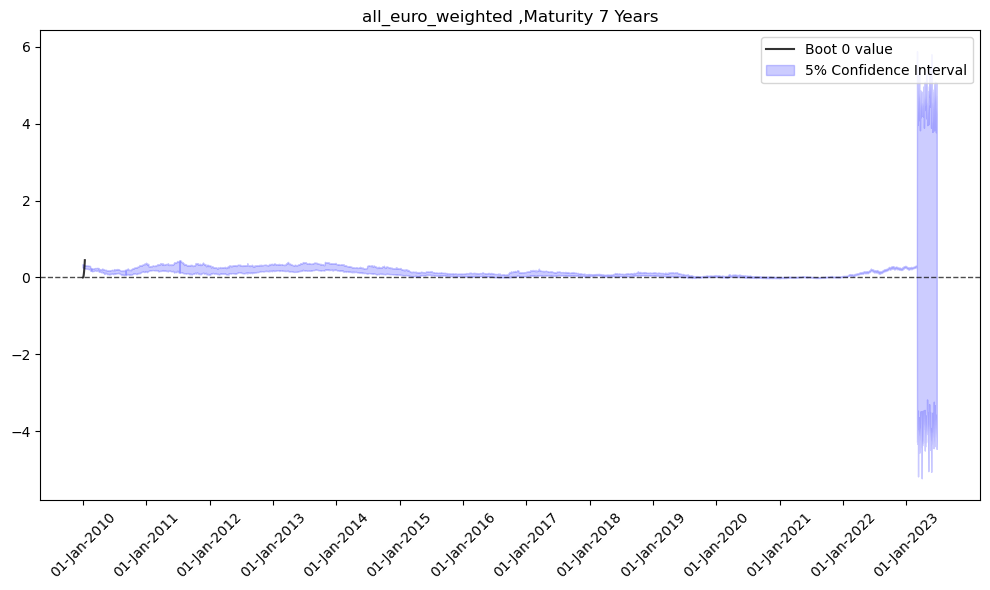

In [431]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

boot0_df = pd.DataFrame(df_interest_boot0[:, 8])

array = boot0_df.iloc[:,0].to_numpy()

# array = df_interest_boot0.iloc[0].to_numpy()

# Assuming dfs[0] to dfs[6] are your DataFrames for each maturity
# Let's take the first maturity as an example (dfs[0])
#df_maturity_7 = dfs[0]  # This is the 4928x5000 DataFrame for the first maturity

# Compute the mean across the 5000 bootstraps for each time step
mean_maturity_1 = df_maturity_9.median(axis=1)

# Compute the 2.5th and 97.5th percentiles (for the 5% confidence interval)
lower_bound = np.percentile(df_maturity_9, 2.5, axis=1)
upper_bound = np.percentile(df_maturity_9, 97.5, axis=1)

# Plot the mean and the confidence intervals
plt.figure(figsize=(10,6))
plt.plot(array, label="Boot 0 value", color='black', alpha = 0.8)

# Shaded region for confidence intervals
plt.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.7)

# Set x-ticks to correspond to 1st January of each year
plt.xticks(tick_positions, tick_dates.strftime('%d-%b-%Y'), rotation=45)

# Add labels and title

plt.title(f"{country} ,Maturity 7 Years")
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.savefig(f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Plots/Sovereign/CDS/{country}/Interest Rate/Boot 0 Value/7 Years.png")

plt.show()


# 8 Years

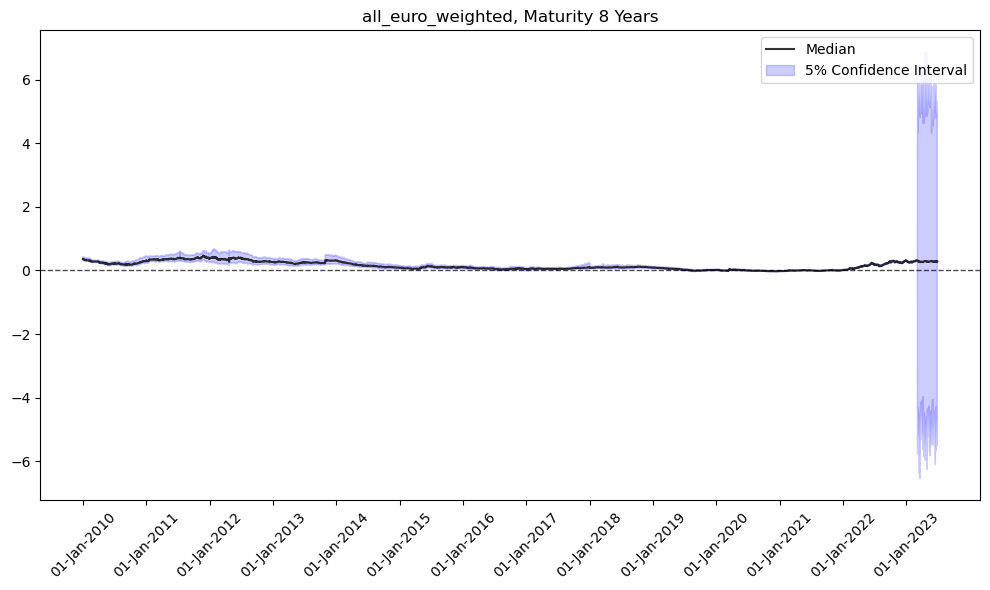

In [432]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

start_date = datetime.datetime(2010, 1, 1)
date_range = pd.date_range(start=start_date, periods=4928, freq='D')

tick_dates = pd.date_range(start=start_date, periods=4928//365+1, freq='YS')
tick_positions = [date_range.get_loc(date) for date in tick_dates]

mean_maturity_1 = df_maturity_10.median(axis=1)

# Compute the 2.5th and 97.5th percentiles (for the 5% confidence interval)
lower_bound = np.percentile(df_maturity_10, 2.5, axis=1)
upper_bound = np.percentile(df_maturity_10, 97.5, axis=1)

# Plot the mean and the confidence intervals
plt.figure(figsize=(10,6))
plt.plot(mean_maturity_1, label="Median", color='black', alpha = 0.8)

# Shaded region for confidence intervals
plt.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.7)

# Set x-ticks to correspond to 1st January of each year
plt.xticks(tick_positions, tick_dates.strftime('%d-%b-%Y'), rotation=45)

# Add labels and title

plt.title(f"{country}, Maturity 8 Years")
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.savefig(f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Plots/Sovereign/CDS/{country}/Interest Rate/Median/8 Years.png")

plt.show()


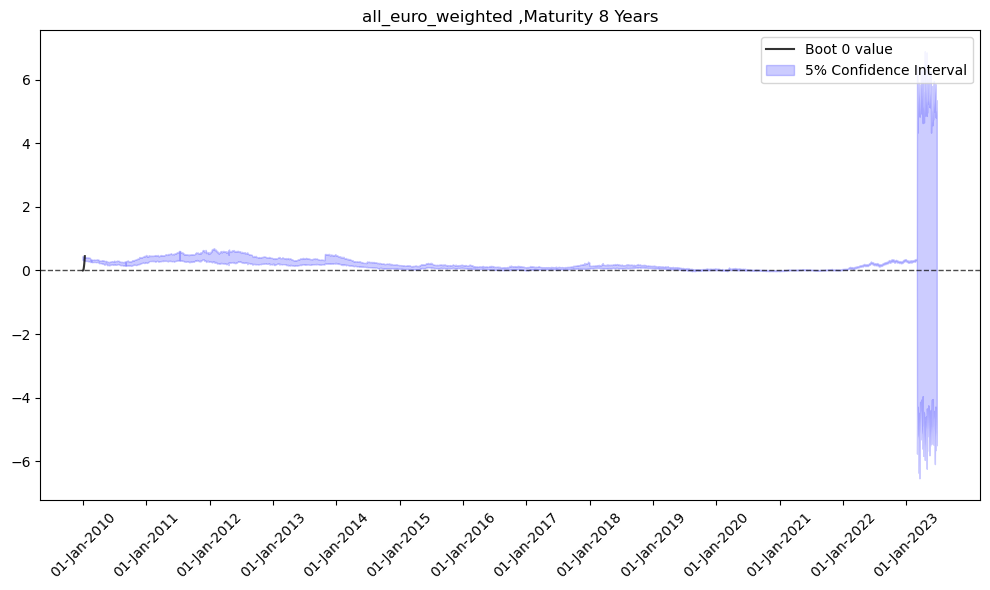

In [433]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

boot0_df = pd.DataFrame(df_interest_boot0[:, 9])

array = boot0_df.iloc[:,0].to_numpy()

# array = df_interest_boot0.iloc[0].to_numpy()

# Assuming dfs[0] to dfs[6] are your DataFrames for each maturity
# Let's take the first maturity as an example (dfs[0])
#df_maturity_7 = dfs[0]  # This is the 4928x5000 DataFrame for the first maturity

# Compute the mean across the 5000 bootstraps for each time step
mean_maturity_1 = df_maturity_10.median(axis=1)

# Compute the 2.5th and 97.5th percentiles (for the 5% confidence interval)
lower_bound = np.percentile(df_maturity_10, 2.5, axis=1)
upper_bound = np.percentile(df_maturity_10, 97.5, axis=1)

# Plot the mean and the confidence intervals
plt.figure(figsize=(10,6))
plt.plot(array, label="Boot 0 value", color='black', alpha = 0.8)

# Shaded region for confidence intervals
plt.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.7)

# Set x-ticks to correspond to 1st January of each year
plt.xticks(tick_positions, tick_dates.strftime('%d-%b-%Y'), rotation=45)

# Add labels and title

plt.title(f"{country} ,Maturity 8 Years")
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.savefig(f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Plots/Sovereign/CDS/{country}/Interest Rate/Boot 0 Value/8 Years.png")

plt.show()


# 9 Years

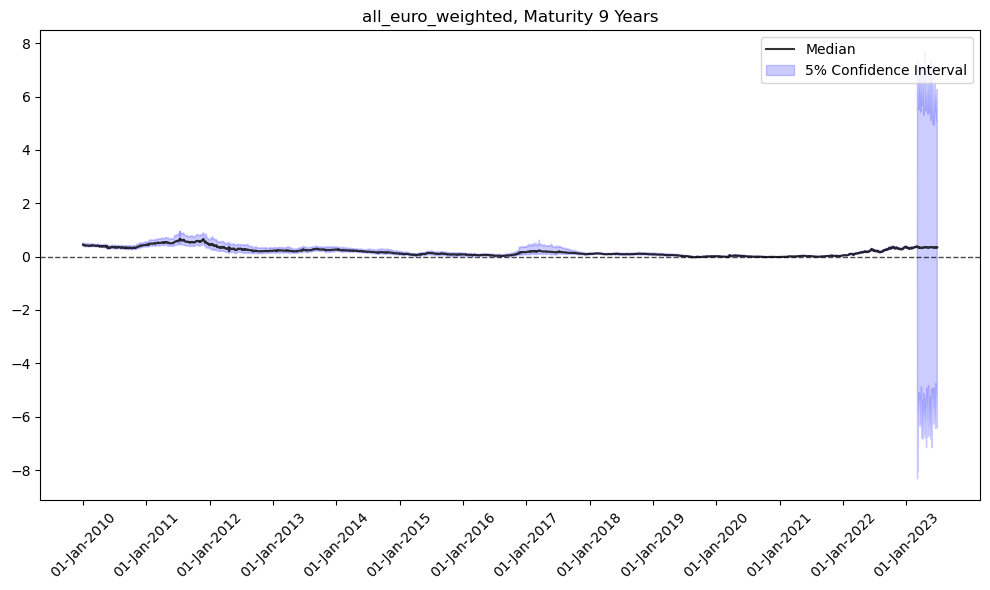

In [434]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

start_date = datetime.datetime(2010, 1, 1)
date_range = pd.date_range(start=start_date, periods=4928, freq='D')

tick_dates = pd.date_range(start=start_date, periods=4928//365+1, freq='YS')
tick_positions = [date_range.get_loc(date) for date in tick_dates]

mean_maturity_1 = df_maturity_11.median(axis=1)

# Compute the 2.5th and 97.5th percentiles (for the 5% confidence interval)
lower_bound = np.percentile(df_maturity_11, 2.5, axis=1)
upper_bound = np.percentile(df_maturity_11, 97.5, axis=1)

# Plot the mean and the confidence intervals
plt.figure(figsize=(10,6))
plt.plot(mean_maturity_1, label="Median", color='black', alpha = 0.8)

# Shaded region for confidence intervals
plt.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.7)

# Set x-ticks to correspond to 1st January of each year
plt.xticks(tick_positions, tick_dates.strftime('%d-%b-%Y'), rotation=45)

# Add labels and title

plt.title(f"{country}, Maturity 9 Years")
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.savefig(f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Plots/Sovereign/CDS/{country}/Interest Rate/Median/9 Years.png")

plt.show()


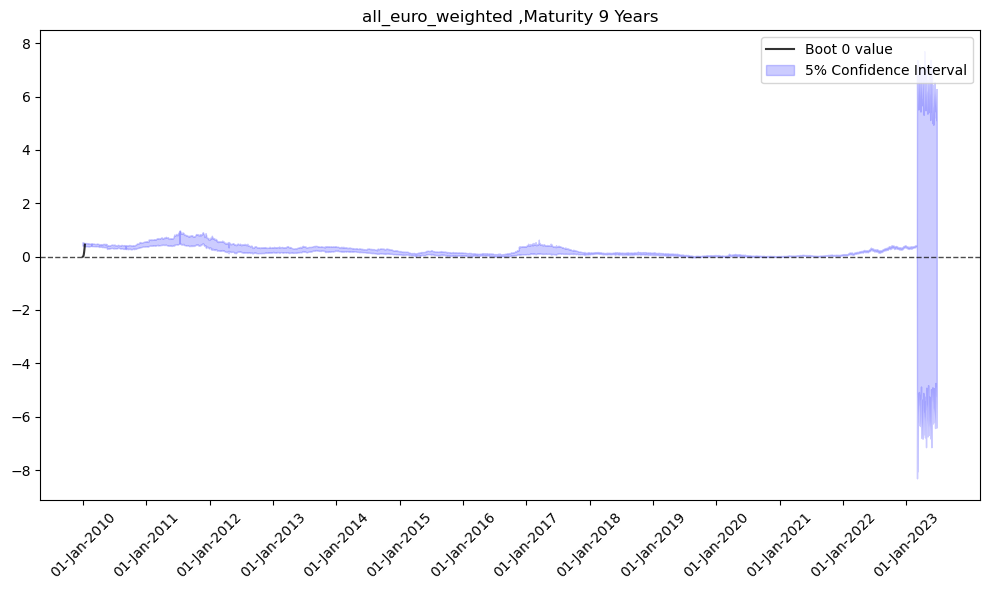

In [435]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

boot0_df = pd.DataFrame(df_interest_boot0[:, 10])

array = boot0_df.iloc[:,0].to_numpy()

# array = df_interest_boot0.iloc[0].to_numpy()

# Assuming dfs[0] to dfs[6] are your DataFrames for each maturity
# Let's take the first maturity as an example (dfs[0])
#df_maturity_7 = dfs[0]  # This is the 4928x5000 DataFrame for the first maturity

# Compute the mean across the 5000 bootstraps for each time step
mean_maturity_1 = df_maturity_11.median(axis=1)

# Compute the 2.5th and 97.5th percentiles (for the 5% confidence interval)
lower_bound = np.percentile(df_maturity_11, 2.5, axis=1)
upper_bound = np.percentile(df_maturity_11, 97.5, axis=1)

# Plot the mean and the confidence intervals
plt.figure(figsize=(10,6))
plt.plot(array, label="Boot 0 value", color='black', alpha = 0.8)

# Shaded region for confidence intervals
plt.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.7)

# Set x-ticks to correspond to 1st January of each year
plt.xticks(tick_positions, tick_dates.strftime('%d-%b-%Y'), rotation=45)

# Add labels and title

plt.title(f"{country} ,Maturity 9 Years")
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.savefig(f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Plots/Sovereign/CDS/{country}/Interest Rate/Boot 0 Value/9 Years.png")

plt.show()


# 10 Years

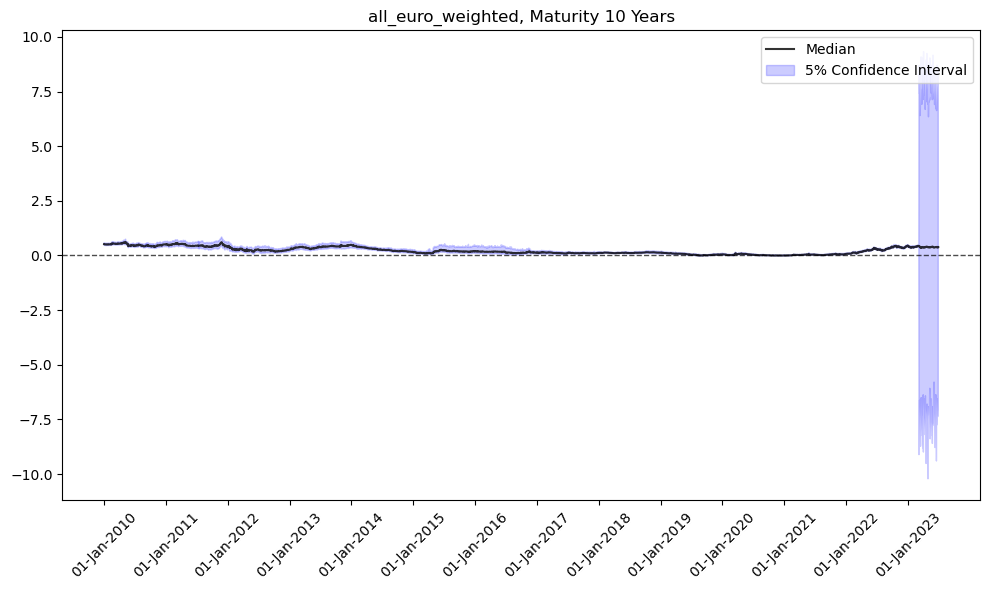

In [436]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

start_date = datetime.datetime(2010, 1, 1)
date_range = pd.date_range(start=start_date, periods=4928, freq='D')

tick_dates = pd.date_range(start=start_date, periods=4928//365+1, freq='YS')
tick_positions = [date_range.get_loc(date) for date in tick_dates]

mean_maturity_1 = df_maturity_12.median(axis=1)

# Compute the 2.5th and 97.5th percentiles (for the 5% confidence interval)
lower_bound = np.percentile(df_maturity_12, 2.5, axis=1)
upper_bound = np.percentile(df_maturity_12, 97.5, axis=1)

# Plot the mean and the confidence intervals
plt.figure(figsize=(10,6))
plt.plot(mean_maturity_1, label="Median", color='black', alpha = 0.8)

# Shaded region for confidence intervals
plt.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.7)

# Set x-ticks to correspond to 1st January of each year
plt.xticks(tick_positions, tick_dates.strftime('%d-%b-%Y'), rotation=45)

# Add labels and title

plt.title(f"{country}, Maturity 10 Years")
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.savefig(f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Plots/Sovereign/CDS/{country}/Interest Rate/Median/10 Years.png")

plt.show()


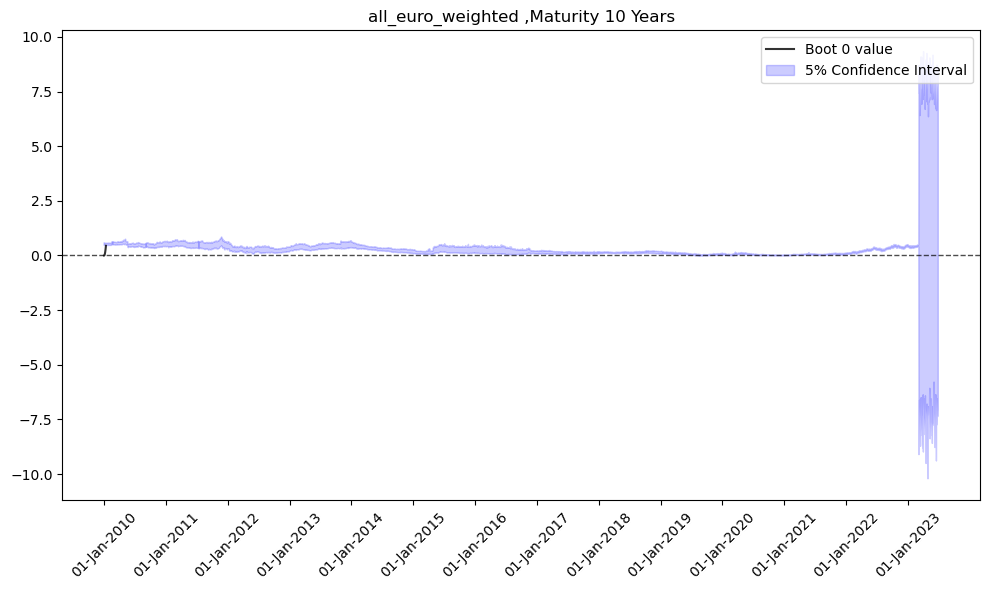

In [437]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

boot0_df = pd.DataFrame(df_interest_boot0[:, 11])

array = boot0_df.iloc[:,0].to_numpy()

# array = df_interest_boot0.iloc[0].to_numpy()

# Assuming dfs[0] to dfs[6] are your DataFrames for each maturity
# Let's take the first maturity as an example (dfs[0])
#df_maturity_7 = dfs[0]  # This is the 4928x5000 DataFrame for the first maturity

# Compute the mean across the 5000 bootstraps for each time step
mean_maturity_1 = df_maturity_12.median(axis=1)

# Compute the 2.5th and 97.5th percentiles (for the 5% confidence interval)
lower_bound = np.percentile(df_maturity_12, 2.5, axis=1)
upper_bound = np.percentile(df_maturity_12, 97.5, axis=1)

# Plot the mean and the confidence intervals
plt.figure(figsize=(10,6))
plt.plot(array, label="Boot 0 value", color='black', alpha = 0.8)

# Shaded region for confidence intervals
plt.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha = 0.7)

# Set x-ticks to correspond to 1st January of each year
plt.xticks(tick_positions, tick_dates.strftime('%d-%b-%Y'), rotation=45)

# Add labels and title

plt.title(f"{country} ,Maturity 10 Years")
plt.legend()
plt.grid(False)
plt.tight_layout()

plt.savefig(f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Plots/Sovereign/CDS/{country}/Interest Rate/Boot 0 Value/10 Years.png")

plt.show()
